## Final Project Submission

Please fill out:
* Student name: Valerie Kiprop
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL: 



In [2]:
# Your code here - remember to use markdown cells for comments as well!

In [87]:
import pandas as pd
import numpy as np
import os
import gzip
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns 

Access the files on zippedData folder

In [4]:
cd zippedData

C:\Users\jeron\Downloads\DataScience\dsc-phase-1-Microsoft-Movies-Project\zippedData


In [5]:
with gzip.open('tn.movie_budgets.csv.gz') as file_in:
    budgets = pd.read_csv(file_in)

budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [6]:
with gzip.open('tmdb.movies.csv.gz') as file_in:
    movies = pd.read_csv(file_in, index_col = 0)

movies.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


## Objectives.
    
1. To understand which genres are most popular among audiences.
2. Explore the correlation between high vote averages and genre popularity to inform Microsoft's content strategy.
3. To determine how audience engagement affects a movie's success.





### Cleaning movies dataframe.
This data is from The Movie Databas (TMDB), and is titled Movies. 

In [7]:
#this is the content of the data
movies.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [8]:
movies.shape

(26517, 9)

In [9]:
movies.columns

Index(['genre_ids', 'id', 'original_language', 'original_title', 'popularity',
       'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')

In [10]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


### Movies dataframe details
The table has 9 columns and 26517 rows.

The data types is as follows.The columns containing strings are type object, whereas the columns containing decimal numbers are type float64. The columns containing intergers are type int64.
The column original_title is same as title, I will be dropping one of them for better data analysis. Dropping this column will not change the meaningfullness of the data.
genre_ids column contains lists with numbers inside.

In [11]:
movies.shape

(26517, 9)

In [12]:
# Drop the 'original_title' column
movies.drop(columns=['original_title'], inplace=True)
#Drop the 'original_language' column
movies.drop(columns=['original_language'], inplace=True)

In [13]:
movies.head()

,genre_ids,id,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,27.920,2010-07-16,Inception,8.3,22186


In [14]:
popular_movies = movies.sort_values(by='vote_count', ascending=False)
popular_movies.head(10)

,genre_ids,id,popularity,release_date,title,vote_average,vote_count
4,"[28, 878, 12]",27205,27.920,2010-07-16,Inception,8.3,22186
17383,"[28, 12, 35]",293660,35.067,2016-02-12,Deadpool,7.6,20175
5179,"[878, 28, 12]",24428,50.289,2012-05-04,The Avengers,7.6,19673
6,"[28, 12, 14, 878]",19995,26.526,2009-12-18,Avatar,7.4,18676
11032,"[12, 18, 878]",157336,28.440,2014-11-05,Interstellar,8.2,18597
11021,"[28, 878, 12]",118340,49.606,2014-08-01,Guardians of the Galaxy,7.9,17958
5189,"[18, 37]",68718,21.260,2012-12-25,Django Unchained,8.0,15725
5235,"[878, 12, 14]",70160,14.212,2012-03-23,The Hunger Games,7.1,14587
14177,"[28, 12, 878]",76341,28.099,2015-05-15,Mad Max: Fury Road,7.4,14454
7881,"[28, 12, 878]",68721,32.093,2013-05-03,Iron Man 3,6.9,14155


In [43]:
movies['genre_ids'].shape

(26517,)

### Cleaning budgets dataframe.
This data is from tn Movie budgets,  and is titled budgets.

In [15]:
budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [16]:
budgets.shape

(5782, 6)

In [17]:
budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


### Budgets dataframe details.
The table has 5782 rows and 6 columns
The columns containing strings are type object, whereas the columns containing intergers is int64 type.
Production_budget, domestic_gross and foreign_gross columns have $ sign which makes the datatype objects and not interger of float data type. I will remove the spaces,dollar sign and commas to make the data intergers.
The id column and release_date columns will be dropped before merging. id column wont be necessary in our analysis while the release_date column is also present in movies dataframe.

In [18]:
# Remove $, space, and comma characters and convert to integers
columns_to_clean = ['production_budget', 'domestic_gross', 'worldwide_gross']

for col in columns_to_clean:
    budgets[col] = pd.to_numeric(budgets[col].astype(str).str.replace('[$, ]', '', regex=True), errors='coerce')

# Now, the columns are cleaned and contain integers
budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [19]:
# Drop the 'release_date' column
budgets.drop(columns=['release_date'], inplace=True)
#Drop the 'id' column
budgets.drop(columns=['id'], inplace=True)

In [20]:
budgets.head()

,movie,production_budget,domestic_gross,worldwide_gross
0,Avatar,425000000,760507625,2776345279
1,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,Dark Phoenix,350000000,42762350,149762350
3,Avengers: Age of Ultron,330600000,459005868,1403013963
4,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


### Merging budgets and movies dataframes.
Merging the data will make it easy for analysis.

In [22]:
# Merge the DataFrames based on matching 'title' and 'movie' with a conditional check
movies_budgets = movies.merge(budgets, left_on='title', right_on='movie', how='inner')
#Drop the title column to remain with movie column, has it has the same text data
movies_budgets.drop(columns=['title'], inplace=True)
# Now, merged_df contains the combined data based on matching 'title' and 'movie'
movies_budgets.head()

,genre_ids,id,popularity,release_date,vote_average,vote_count,movie,production_budget,domestic_gross,worldwide_gross
0,"[14, 12, 16, 10751]",10191,28.734,2010-03-26,7.7,7610,How to Train Your Dragon,165000000,217581232,494870992
1,"[12, 28, 878]",10138,28.515,2010-05-07,6.8,12368,Iron Man 2,170000000,312433331,621156389
2,"[16, 35, 10751]",862,28.005,1995-11-22,7.9,10174,Toy Story,30000000,191796233,364545516
3,"[16, 35, 10751]",862,28.005,1995-11-22,7.9,10174,Toy Story,30000000,191796233,364545516
4,"[28, 878, 12]",27205,27.920,2010-07-16,8.3,22186,Inception,160000000,292576195,835524642


In [23]:
movies_budgets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2385 entries, 0 to 2384
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          2385 non-null   object 
 1   id                 2385 non-null   int64  
 2   popularity         2385 non-null   float64
 3   release_date       2385 non-null   object 
 4   vote_average       2385 non-null   float64
 5   vote_count         2385 non-null   int64  
 6   movie              2385 non-null   object 
 7   production_budget  2385 non-null   int64  
 8   domestic_gross     2385 non-null   int64  
 9   worldwide_gross    2385 non-null   int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 205.0+ KB


### Objectives
#### 1. To understand which genres are most popular among audiences.



In [35]:
#popular movies
popular_movies = movies_budgets.sort_values(by='popularity', ascending=False)
popular_movies.head()

,genre_ids,id,popularity,release_date,vote_average,vote_count,movie,production_budget,domestic_gross,worldwide_gross,genre_names
2251,"[12, 28, 14]",299536,80.773,2018-04-27,8.3,13948,Avengers: Infinity War,300000000,678815482,2048134200,"[None, None, None, None, None, None, None, Non..."
1227,"[28, 53]",245891,78.123,2014-10-24,7.2,10081,John Wick,30000000,43037835,76235001,"[None, None, None, None, None, None, None, None]"
1228,"[28, 12, 14]",122917,53.783,2014-12-17,7.3,8392,The Hobbit: The Battle of the Five Armies,250000000,255119788,945577621,"[None, None, None, None, None, None, None, Non..."
683,"[878, 28, 12]",24428,50.289,2012-05-04,7.6,19673,The Avengers,225000000,623279547,1517935897,"[None, None, None, None, None, None, None, Non..."
684,"[878, 28, 12]",24428,50.289,2012-05-04,7.6,19673,The Avengers,60000000,23385416,48585416,"[None, None, None, None, None, None, None, Non..."


### The top 5 most popular genres are listed below

In [56]:
#Top 5 most popular genres in the top 100 rows:
# Flatten the 'genre_ids' column
popular_movies = popular_movies.explode('genre_ids')

# Filter the top 100 rows
top_100_df = popular_movies.head(100)

# Group by genre and calculate popularity
genre_popularity = top_100_df.groupby('genre_ids')['popularity'].sum()

# Sort by popularity in descending order
genre_popularity_sorted = genre_popularity.sort_values(ascending=False)

# Select the top 5 most popular genres
top_5_popular_genres = genre_popularity_sorted.head(5)

print("Top 5 most popular genres in the top 100 rows:")
top_5_popular_genres




Top 5 most popular genres in the top 100 rows:


genre_ids
[28, 12, 14, 878]    249.650
[28, 12, 878]        212.113
[28, 12, 14]         180.375
[878, 28, 12]        133.293
[12, 28, 14]         111.352
Name: popularity, dtype: float64

#### The result shows a list of intergers, each interger represents a genre.
##### The most common genres are:
1. 28- Action
2. 12- Adventure
3. 14- Fantasy
4. 878- Science Fiction
#### Of the 100 most popular films, how many of them are of action,fantasy, science fiction or adventure genres respectively. 
  

In [66]:

# popular action films count
action = popular_movies[popular_movies['genre_ids'].apply(lambda x: '28' in x)]
#Get the top 10 movie names from 'df2'
top_100_popular = popular_movies['movie'].head(100)
# Count the number of items in 'scifi_df2_filtered' that are in the top 10 of 'df2'
action_count = action['movie'].isin(top_100_popular).sum()
action_count



69

In [67]:
# popular adventure films count
adventue = popular_movies[popular_movies['genre_ids'].apply(lambda x: '12' in x)]
#Get the top 10 movie names from 'df2'
top_100_popular = popular_movies['movie'].head(100)
# Count the number of items in 'scifi_df2_filtered' that are in the top 10 of 'df2'
action_count = adventue['movie'].isin(top_100_popular).sum()
action_count



61

In [69]:
# popular fantasy films count
fantasy = popular_movies[popular_movies['genre_ids'].apply(lambda x: '14' in x)]
#Get the top 10 movie names from 'df2'
top_100_popular = popular_movies['movie'].head(100)
# Count the number of items in 'scifi_df2_filtered' that are in the top 10 of 'df2'
action_count = fantasy['movie'].isin(top_100_popular).sum()
action_count



38

In [70]:
# popular science fiction films count
scifi = popular_movies[popular_movies['genre_ids'].apply(lambda x: '878' in x)]
#Get the top 10 movie names from 'df2'
top_100_popular = popular_movies['movie'].head(100)
# Count the number of items in 'scifi_df2_filtered' that are in the top 10 of 'df2'
action_count = scifi['movie'].isin(top_100_popular).sum()
action_count



39

### Explore the correlation between high vote averages and genre popularity to inform Microsoft's content strategy.

In [78]:
# Calculate genre popularity by summing popularity scores for each genre
genre_popularity = movies_budgets.explode('genre_ids').groupby('genre_ids')['popularity'].sum().reset_index()

# Step 2: Correlation Analysis
# Merge genre popularity back into the main DataFrame
#movies_budgets = pd.merge(movies_budgets, genre_popularity, on='genre_ids', how='left')

# Calculate the correlation between vote_average and genre popularity
correlation = movies_budgets['vote_average'].corr(movies_budgets['popularity'])

print(f"Correlation between vote_average and genre popularity: {correlation:.2f}")


Correlation between vote_average and genre popularity: 0.30


This scatter plot will allow you to visually assess the relationship between vote average and genre popularity in your dataset. Points clustered together may indicate a correlation between the two variables.


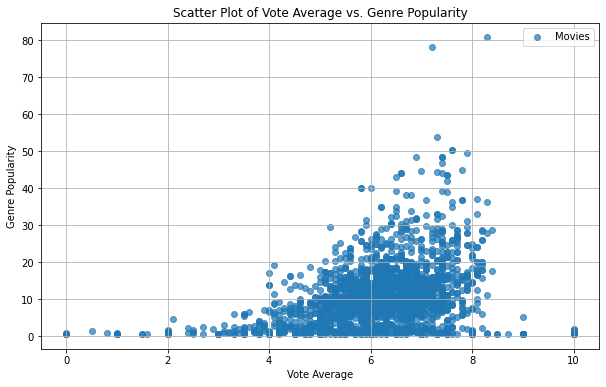

In [89]:
# Create a scatter plot to visualize the correlation
plt.figure(figsize=(10, 6))
plt.scatter(movies_budgets['vote_average'], movies_budgets['popularity'], alpha=0.7, label='Movies')
plt.title('Scatter Plot of Vote Average vs. Genre Popularity')
plt.xlabel('Vote Average')
plt.ylabel('Genre Popularity')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

##### A correlation coefficient of 0.30 indicates a positive but relatively weak correlation between the vote_average and genre popularity in your dataset. 
##### There is a lot of variability in the data, and other factors may also be influencing genre popularity.
##### There is some tendency for movies with higher vote averages to have higher genre popularity, but the relationship is not strong enough to make accurate predictions or conclusions based solely on vote averages.


#### To determine how audience engagement affects a movie's success

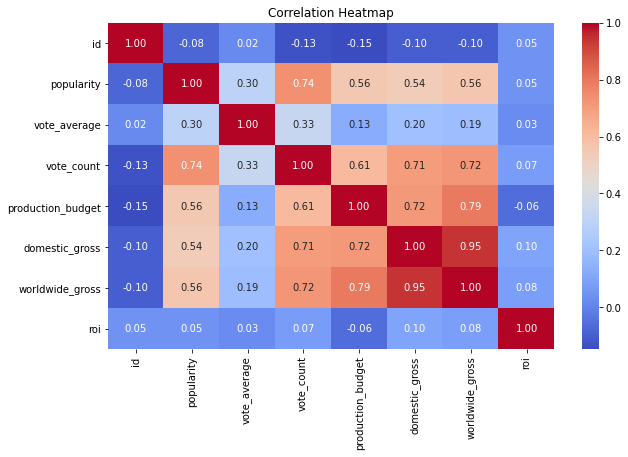

In [90]:
# Step 2: Correlation Analysis
correlation_matrix = movies_budgets.corr()
# Step 3: Visualization
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

The heatmap provides a visual representation of the relationships between variables, and the specific correlation coefficient (0.30) between vote_average and popularity indicates a weak positive correlation, suggesting that higher-rated movies tend to be more popular, but the relationship is not very strong.

#### 4. To determine which budget ranges yield the best returns.
 For profit calculations, 
 Calculate profitability as the ROI (Return on Investment) for each movie, which is defined as: ROI = (worldwide_gross - production_budget) / production_budget.
 Create budget ranges (e.g., low-budget, medium-budget, high-budget) based on the values in the production_budget column.
 Calculate the average profitability for each budget range group. This will tell you which budget ranges, on average, yield better returns.

In [105]:
# Calculate ROI (profitability) for each movie
movies_budgets['roi'] = (movies_budgets['worldwide_gross'] - movies_budgets['production_budget']) / movies_budgets['production_budget']

# Define budget ranges (you can customize these ranges)
budget_ranges = {
    'Low Budget': (0, 5000000),
    'Medium Budget': (5000000, 20000000),
    'High Budget': (20000000, float('inf'))  # Adjust this range as needed
}

# Categorize movies into budget ranges
for budget_range, (min_budget, max_budget) in budget_ranges.items():
    movies_budgets[budget_range] = ((movies_budgets['production_budget'] >= min_budget) & (movies_budgets['production_budget'] < max_budget))

# Calculate average profitability by budget range
average_profitability_by_range = {}
for budget_range in budget_ranges.keys():
    average_profitability = movies_budgets[movies_budgets[budget_range]]['roi'].mean()
    average_profitability_by_range[budget_range] = average_profitability

# Display average profitability by budget range
print("Average Profitability by Budget Range:")
print(average_profitability_by_range)


Average Profitability by Budget Range:
{'Low Budget': 6.490867471579884, 'Medium Budget': 3.114150859327876, 'High Budget': 1.9245106007350985}
